<h1 align = 'center'> Learning To See </h1>

<h2 align = 'center'> Part 5: To Learn is to Generalize </h2>



### Import finger dataset

This dataset has been preprocessed. See Data Preprocessing notebook for more details. 

In [1]:
%pylab inline
from supportFunctions import *
import _pickle as pickle

pickleFileName = 'data/fingerDataSet' + '.pickle'
pickleFile = open(pickleFileName, 'rb')
data = pickle.load(pickleFile)
pickleFile.close()

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Our overall dataset has 54, examples, let's just look at 3:
exampleIndices = [7, 30, 46]

# Look at performance from last time quickly

- Last time, our algorithm was performing suspiciously well on data it had already seen

In [3]:
# Extract 9x9 example grids and correct labels from our 3 images:
examples = [data[index] for index in exampleIndices]
X, y = extractExamplesFromList(examples, whichImage = 'image1bit', dist = 4)

#Find unique examples of fingers:
fingerExamples, uniqueIndices, uniqueCounts = findUniqueRowsAndCount(X[y==1])

#And let these example be our rules:
rules = fingerExamples.copy()

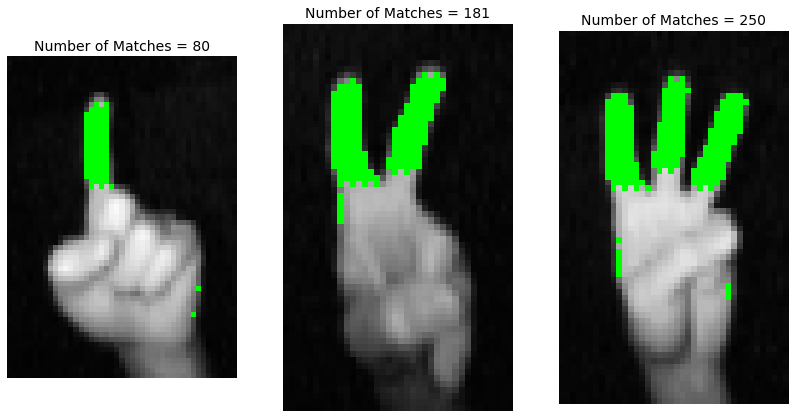

In [4]:
fig = figure(0, (14, 8))
showMatches(rules = rules, exampleIndices = exampleIndices, data=data, fig=fig)

### Compute Confusion Matrix

In [11]:
# Search for matches to rules
matchingIndices = np.array([], dtype = 'int')
for rule in rules:
    difference = X - rule
    mI = np.where(~difference.any(axis=1))[0]
    matchingIndices = np.concatenate((matchingIndices, mI))

#Make yHat vector, tells us which pixels our rules predict to be fingers.
yHat = np.zeros(X.shape[0])
yHat[matchingIndices] = 1

#Count up False Negatives, False Positives, True Positives, and True Negatives
FN =  np.sum(np.logical_and(y==1, yHat==0))
FP =  np.sum(np.logical_and(y==0, yHat==1))
TP = np.sum(np.logical_and(y==1, yHat==1))
TN = np.sum(np.logical_and(y==0, yHat==0))
    
#make confusion matrix:
confusionMatrix = np.array([[TP, FN], [FP, TN]])

print (confusionMatrix)

[[ 495    0]
 [  16 7356]]


- Compute recall, precision:

In [12]:
recall = float(TP)/(TP+FN)
precision = float(TP)/(TP+FP)

print (recall, precision)

1.0 0.9686888454011742


# Now, let's test on data we didn't train on

In [13]:
testingExampleIndices = [34, 45]

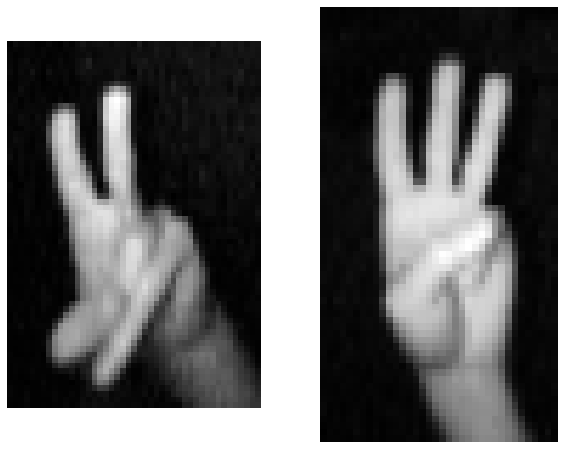

In [14]:
fig = figure(0, (10,8))

for i, exampleIndex in enumerate(testingExampleIndices):
    subplot(1,2,i+1)
    imshow(data[exampleIndex]['croppedImage'], cmap = 'gray', interpolation = 'none')
    axis('off')

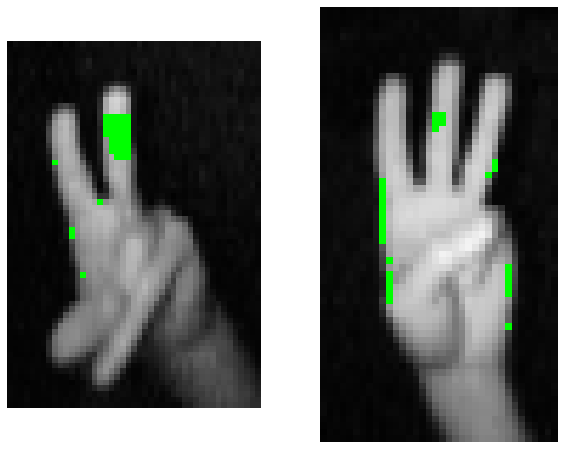

In [15]:
fig = figure(0, (10, 8))
showMatches(rules = rules, exampleIndices = testingExampleIndices, \
            data=data, fig=fig, verbose = False)

- What happened!? Where did all our pretty matches go?!?!
- Let's measure our new performance to see just how bad it is...

In [16]:
testingExamples = [data[index] for index in testingExampleIndices]
testX, testY = extractExamplesFromList(testingExamples, \
                                       whichImage = 'image1bit', dist = 4)

In [17]:
testX.shape

(5301, 81)

In [18]:
sum(testY==1)

396

In [19]:
# Search for matches to rules
matchingIndices = np.array([], dtype = 'int')
for rule in rules:
    difference = testX - rule
    mI = np.where(~difference.any(axis=1))[0]
    matchingIndices = np.concatenate((matchingIndices, mI))

#Make yHat vector, tells us which pixels our rules predict to be fingers.
yHat = np.zeros(testX.shape[0])
yHat[matchingIndices] = 1

#Count up False Negatives, False Positives, True Positives, and True Negatives
FN =  np.sum(np.logical_and(testY==1, yHat==0))
FP =  np.sum(np.logical_and(testY==0, yHat==1))
TP = np.sum(np.logical_and(testY==1, yHat==1))
TN = np.sum(np.logical_and(testY==0, yHat==0))
    
#make confusion matrix:
confusionMatrix = np.array([[TP, FN], [FP, TN]])

print (confusionMatrix)

[[  45  351]
 [  25 4880]]


In [20]:
accuracy = float(TP+TN)/float(testX.shape[0])
recall = float(TP)/(TP+FN)
precision = float(TP)/(TP+FP)

print (accuracy, recall, precision)

0.9290699867949443 0.11363636363636363 0.6428571428571429


## 11% recall, 64% precision

- TERRIBLE!

## Compute Performance Metrics for Baseline and Knowledge Engineering Appraoches on Test Set for Comparison.

In [21]:
ruleToSample = np.array(([[ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                          [ 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0], 
                          [ 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0], 
                          [ 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0]]))

In [22]:
rules = []
for i in range(6):
    for j in range(5):
        rules.append(ruleToSample[i:i+9, j:j+9])

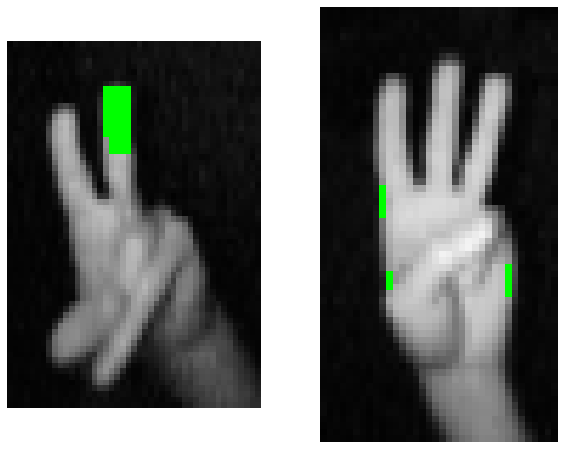

In [23]:
fig = figure(0, (10,8))
showMatches(rules = rules, exampleIndices = testingExampleIndices, \
            data=data, fig=fig, verbose = False)

In [25]:
# Search for matches to rules
matchingIndices = np.array([], dtype = 'int')
for rule in rules:
    difference = testX - rule.ravel()
    mI = np.where(~difference.any(axis=1))[0]
    matchingIndices = np.concatenate((matchingIndices, mI))

#Make yHat vector, tells us which pixels our rules predict to be fingers.
yHat = np.zeros(testX.shape[0])
yHat[matchingIndices] = 1

#Count up False Negatives, False Positives, True Positives, and True Negatives
FN =  np.sum(np.logical_and(testY==1, yHat==0))
FP =  np.sum(np.logical_and(testY==0, yHat==1))
TP = np.sum(np.logical_and(testY==1, yHat==1))
TN = np.sum(np.logical_and(testY==0, yHat==0))
    
#make confusion matrix:
confusionMatrix = np.array([[TP, FN], [FP, TN]])

print (confusionMatrix)

[[  55  341]
 [  15 4890]]


In [26]:
accuracy = float(TP+TN)/float(testX.shape[0])
recall = float(TP)/(TP+FN)
precision = float(TP)/(TP+FP)

print (accuracy, recall, precision)

0.9328428598377665 0.1388888888888889 0.7857142857142857


# Ok, so maybe we just haven't seen enough examples yet?
- Let's increase our number of examples by 10x

In [27]:
trainingExampleIndices = range(30)
trainingExamples = [data[index] for index in trainingExampleIndices]
trainX, trainY = extractExamplesFromList(trainingExamples, whichImage = 'image1bit', dist = 4)

In [28]:
#How many examples of not fingers do we have?
uniqueNonFingers, uniqueIndices, uniqueCounts = findUniqueRowsAndCount(trainX[trainY==0])
uniqueNonFingers.shape

(17578, 81)

In [29]:
#Extract unique examples of fingers:
fingerExamples, uniqueIndices, uniqueCounts = findUniqueRowsAndCount(trainX[trainY==1])
rules = fingerExamples.copy()

- Have a look correct labels for our 30 training examples

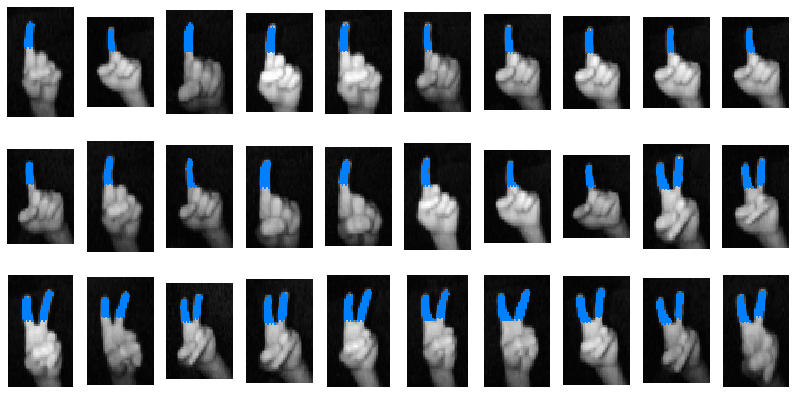

In [30]:
fig = figure(0, (14, 7))

for i in range(30):
    fig.add_subplot(3,10,i+1)
    imageDict = data[trainingExampleIndices[i]]
    
    X1, y1 = extractFeatures(imageDict, whichImage = 'image1bit', dist = 4)
    im = makeGrayScale(imageDict)
    
    yImage = y1.reshape(imageDict['boxHeight'], imageDict['boxWidth'])
    
    #Paint with matches:
    im[:,:,0][yImage==1] = 0
    im[:,:,1][yImage==1] = .5
    im[:,:,2][yImage==1] = 1
    
    imshow(im)
    axis('off')

How many rules (unique examples) do we have now?

In [31]:
rules.shape

(2160, 81)

## How do we do on examples we've arleady seen?

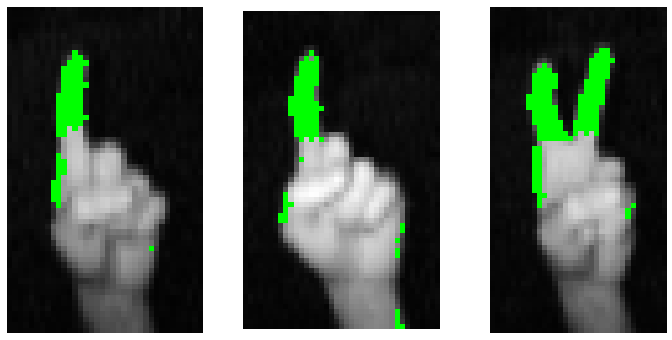

In [32]:
fig = figure(0, (12, 6))
showMatches(rules = rules, exampleIndices = [0, 15, 25], data=data, fig=fig, verbose = False)

In [33]:
# Search for matches to rules
matchingIndices = np.array([], dtype = 'int')
for rule in rules:
    difference = trainX - rule
    mI = np.where(~difference.any(axis=1))[0]
    matchingIndices = np.concatenate((matchingIndices, mI))

#Make yHat vector, tells us which pixels our rules predict to be fingers.
yHat = np.zeros(trainX.shape[0])
yHat[matchingIndices] = 1

#Count up False Negatives, False Positives, True Positives, and True Negatives
FN =  np.sum(np.logical_and(trainY==1, yHat==0))
FP =  np.sum(np.logical_and(trainY==0, yHat==1))
TP = np.sum(np.logical_and(trainY==1, yHat==1))
TN = np.sum(np.logical_and(trainY==0, yHat==0))
    
#make confusion matrix:
confusionMatrix = np.array([[TP, FN], [FP, TN]])

print (confusionMatrix)

[[ 3095     0]
 [  884 71956]]


In [34]:
recall = float(TP)/(TP+FN)
precision = float(TP)/(TP+FP)

print (recall, precision)

1.0 0.7778336265393315


- Pretty well!

## And now, the real test, examples we haven't seen

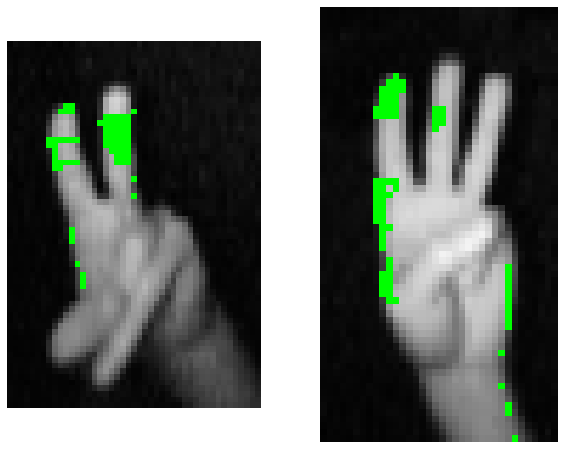

In [35]:
fig = figure(0, (10, 8))
showMatches(rules = rules, exampleIndices = testingExampleIndices, data=data, fig=fig, verbose = False)

In [36]:
# Search for matches to rules
matchingIndices = np.array([], dtype = 'int')
for rule in rules:
    difference = testX - rule
    mI = np.where(~difference.any(axis=1))[0]
    matchingIndices = np.concatenate((matchingIndices, mI))

#Make yHat vector, tells us which pixels our rules predict to be fingers.
yHat = np.zeros(testX.shape[0])
yHat[matchingIndices] = 1

#Count up False Negatives, False Positives, True Positives, and True Negatives
FN =  np.sum(np.logical_and(testY==1, yHat==0))
FP =  np.sum(np.logical_and(testY==0, yHat==1))
TP = np.sum(np.logical_and(testY==1, yHat==1))
TN = np.sum(np.logical_and(testY==0, yHat==0))
    
#make confusion matrix:
confusionMatrix = np.array([[TP, FN], [FP, TN]])

print (confusionMatrix)

[[  84  312]
 [  68 4837]]


In [37]:
recall = float(TP)/(TP+FN)
precision = float(TP)/(TP+FP)

print (recall, precision)

0.21212121212121213 0.5526315789473685


to ppt

## 21% recall, 55% precision

- Recall went up, precision went down. Peformance is still terrible!

## So far, programming  our machine to learn is going terribly, what should we do?

## Big Point 1: Memorizing is not learning.

- Now that we've seen the difference, let's think about why this happened.
- Why did our memorization strategy perform so poorly, even when we increased the amount of data?
- One reason memorization fails is the huge possible variation here. 

In [38]:
trainX.shape

(75935, 81)

We have ~76000 examples, which sounds like a lot. If our strategy is to memorize all example of fingers, we need to see a reasable portion of all possible examples. But how many possible examples are there? Here's 1 possible example:

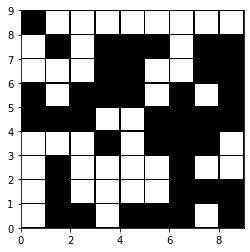

In [39]:
fig = figure(0,(4,4))
pcolor(rand(9,9)>.5, cmap = 'Greys',  linewidth =.5, color = 'k', vmin = 0, vmax = 1)

# Now, how many possible examples are there?